# This script processes the tree related statistics generated by owm_stats.cpp  

1. Generate the file [CloudName].xyz.csv by compiling and running:
    ```
    make bin/stats
    cd scripts
    python3 run_stats.py 
    ```

run_stats.py uses the MinRadius values that result in minimum time without using memoization for OWM= [0.9,0.6,0.2,0.2] and the same for MaxNumber=[512,512,1024,512]

2. Collect the files generated in the cloud directory, with names [CloudName].xyz.csv

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

def readstats(filename):
    f=open(filename)
    lines=f.readlines()
    f.close()

    stats={}
    for line,linenum in zip(lines,range(17)):
        print(line,end='')
    max_histo=int(lines[10].split()[1])
    print('max_histo:',max_histo)

    x=[]
    y=[]
    for line in lines[21:]:
        line=line.split()
        x.append(int(line[0]))
        y.append(int(line[1]))
        if int(line[0])==max_histo:
            break
    return (x,y,max_histo)

def all_level(level):
    clouds=['Alcoy','Arzua','BrionF','BrionU']
    dir='MinRadHisto'+str(level)+'/'
    all_histos=[]
    all_nph=[]
    for cloud in clouds:
        print('Cloud:',cloud)
        x,y,maxh=readstats(dir+cloud+'H_salida.xyz.csv')
        all_histos.append((x,y))
        print('maxh:',maxh)
        all_nph.append(np.zeros(maxh+1))
        for i in range(len(x)):
            all_nph[-1][x[i]]=y[i]
    return all_histos,all_nph

all_histos5,all_nph5=all_level(5)
all_histos7,all_nph7=all_level(7)
all_histos9,all_nph9=all_level(9)


Cloud: Alcoy
HISTOGRAM: ../bin/data/AlcoyH_salida.xyz.csv
N_puntos: 20380212
N_nodos: 35909585
N_nodos_hoja: 26932189
MinRadius: 0.1 m
Area_minima: 0.04 m^2

OBSERVADO: 
N_medio_pts/nodo: 0
__min: 0
__max: 195
Densidad_media: 18.9181
__min: 0
__max: 4875

ESTIMADO: 
N_medio_pts/nodo: 0.302947
max_histo: 195
maxh: 195
Cloud: Arzua
HISTOGRAM: ../bin/data/ArzuaH_salida.xyz.csv
N_puntos: 40706503
N_nodos: 22311765
N_nodos_hoja: 16733824
MinRadius: 0.1 m
Area_minima: 0.04 m^2

OBSERVADO: 
N_medio_pts/nodo: 2
__min: 0
__max: 652
Densidad_media: 60.8147
__min: 0
__max: 16300

ESTIMADO: 
N_medio_pts/nodo: 1.62829
max_histo: 652
maxh: 652
Cloud: BrionF
HISTOGRAM: ../bin/data/BrionFH_salida.xyz.csv
N_puntos: 42384876
N_nodos: 3159757
N_nodos_hoja: 2369818
MinRadius: 0.1 m
Area_minima: 0.04 m^2

OBSERVADO: 
N_medio_pts/nodo: 17
__min: 0
__max: 329
Densidad_media: 447.132
__min: 0
__max: 8225

ESTIMADO: 
N_medio_pts/nodo: 4.78799
max_histo: 329
maxh: 329
Cloud: BrionU
HISTOGRAM: ../bin/data/BrionU

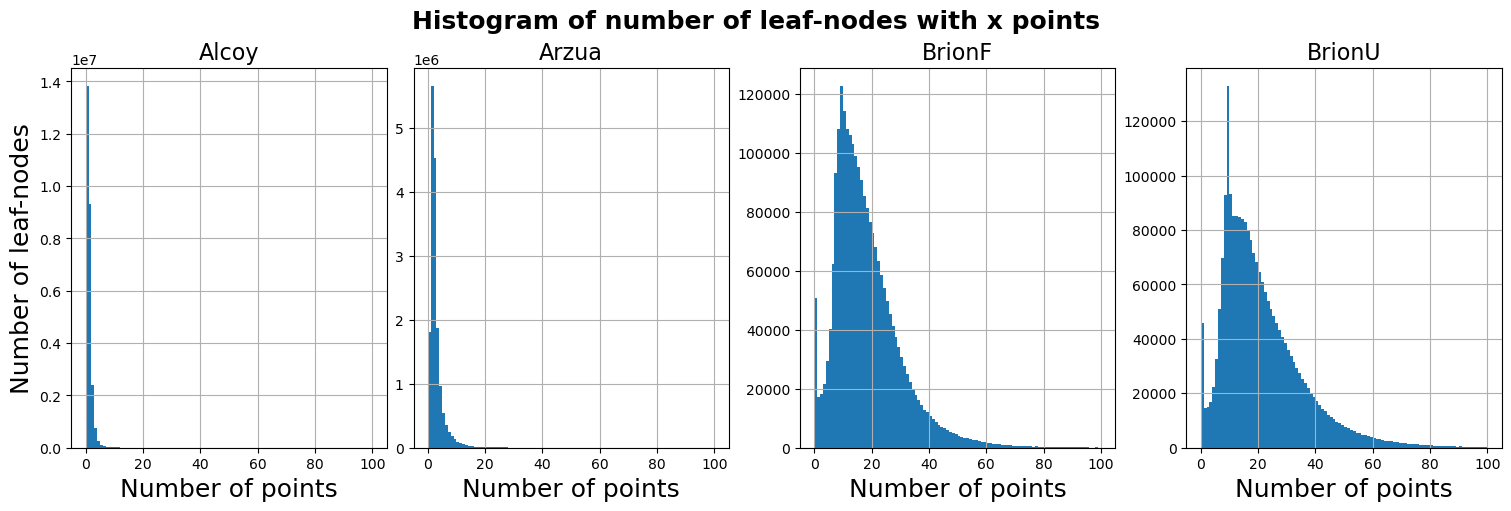

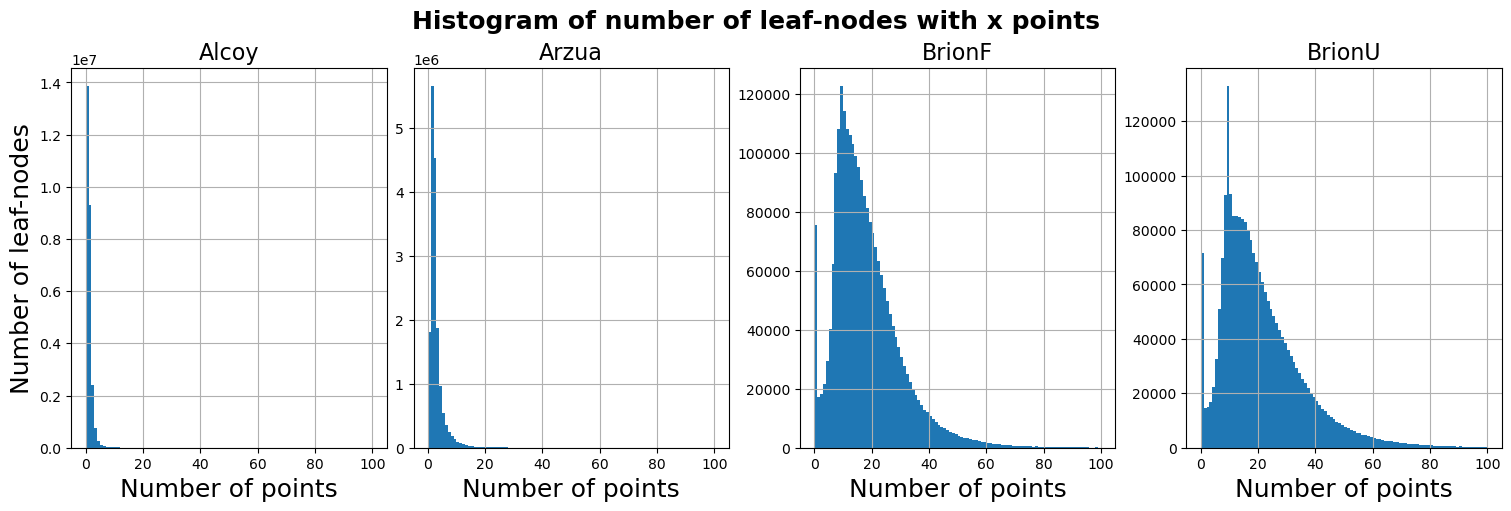

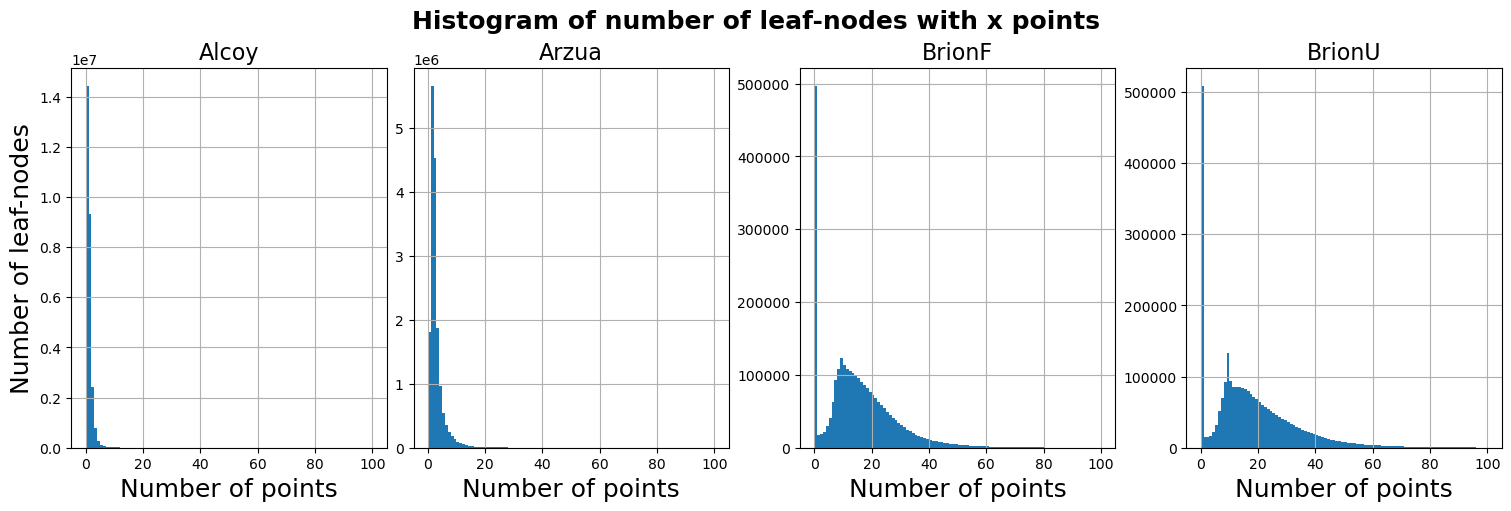

In [26]:
def plot_histo2(all_histo):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    clouds=['Alcoy','Arzua','BrionF','BrionU']
    limits=[1500,3000,600,600]
    minRadius=[0.1,0.1,0.1,0.1]
    
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True)
    for i,name,l in zip(range(len(clouds)),clouds,limits):
        axs[i].stairs(all_histo[i][0:100],fill=True)
        #axs[i].set_label('MinRadius: '+str(minRadius[i]))
        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Number of points', fontsize=xlabelfs)
        #axs[i].set_xticks(all_histos[i][0][::128],fontsize=xticksfs)
        #axs[i].set_xlim(0,1024)
        #axs[i].set_ylim(0,l)

        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()
        #axs[i].legend(loc='best', fontsize= 10)
    fig.suptitle('Histogram of number of leaf-nodes with x points',  fontweight='bold', fontsize=18)
    
    axs[0].set_ylabel('Number of leaf-nodes', fontsize=ylabelfs)
    # pp = PdfPages("Histogram_num_points_minrad2.pdf")
    # pp.savefig(fig)
    # pp.close()

# plt.grid(True)
# plt.show()

plot_histo2(all_nph5)
plot_histo2(all_nph7)
plot_histo2(all_nph9)


In [27]:
#number of empty leaf-nodes
clouds=['Alcoy','Arzua','BrionF','BrionU']
def empty_lev(lev):
    empty_leaf_nodes=[]
    for i in range(len(lev)):
        print('Cloud:',clouds[i],end='')
        print('. Number of empty leaf-nodes: {}'.format(lev[i][0]))  
        empty_leaf_nodes.append(lev[i][0])
print('Level: 5')
empty_lev(all_nph5)
print('Level: 7')
empty_lev(all_nph7)
print('Level: 9')
empty_lev(all_nph9)

Level: 5
Cloud: Alcoy. Number of empty leaf-nodes: 13822865.0
Cloud: Arzua. Number of empty leaf-nodes: 1809758.0
Cloud: BrionF. Number of empty leaf-nodes: 50766.0
Cloud: BrionU. Number of empty leaf-nodes: 45816.0
Level: 7
Cloud: Alcoy. Number of empty leaf-nodes: 13857413.0
Cloud: Arzua. Number of empty leaf-nodes: 1809758.0
Cloud: BrionF. Number of empty leaf-nodes: 75615.0
Cloud: BrionU. Number of empty leaf-nodes: 71661.0
Level: 9
Cloud: Alcoy. Number of empty leaf-nodes: 14423147.0
Cloud: Arzua. Number of empty leaf-nodes: 1809851.0
Cloud: BrionF. Number of empty leaf-nodes: 496548.0
Cloud: BrionU. Number of empty leaf-nodes: 508206.0


In [29]:
#number of leaf-nodes with more than X points
def numleaves(X,all_nph):
    for i in range(len(all_nph)):
        print('Cloud:',clouds[i],end='')
        print('. Number of leaf-nodes with more than '+str(X)+' points: {}'.format(np.sum(all_nph[i][X:])))
numleaves(50,all_nph5)
numleaves(50,all_nph7)
numleaves(50,all_nph9)

Cloud: Alcoy. Number of leaf-nodes with more than 50 points: 66.0
Cloud: Arzua. Number of leaf-nodes with more than 50 points: 8014.0
Cloud: BrionF. Number of leaf-nodes with more than 50 points: 49060.0
Cloud: BrionU. Number of leaf-nodes with more than 50 points: 107597.0
Cloud: Alcoy. Number of leaf-nodes with more than 50 points: 66.0
Cloud: Arzua. Number of leaf-nodes with more than 50 points: 8014.0
Cloud: BrionF. Number of leaf-nodes with more than 50 points: 49060.0
Cloud: BrionU. Number of leaf-nodes with more than 50 points: 107597.0
Cloud: Alcoy. Number of leaf-nodes with more than 50 points: 66.0
Cloud: Arzua. Number of leaf-nodes with more than 50 points: 8014.0
Cloud: BrionF. Number of leaf-nodes with more than 50 points: 49060.0
Cloud: BrionU. Number of leaf-nodes with more than 50 points: 107597.0


# Build LaTeX table

In [22]:
def readlevels(filename):
    f=open(filename)
    lines=f.readlines()
    f.close()

    linenumber=0
    levels={}
    for line in lines:
        if 'HISTOGRAM_DE_NIVELES:' in line:
            break
        else:
            linenumber=linenumber+1
    #print(lines[linenumber+5:])
    for line in lines[linenumber+5:-2]:
        line=line.split()
        levels[int(line[0])]=int(line[1])
    print(levels)
    return levels

clouds=['Alcoy','Arzua','BrionF','BrionU']
dir='MinRadHisto9/'
all_hminrad=[]
total_minrad=[]
for cloud in clouds:
    print('Cloud:',cloud)
    x=readlevels(dir+cloud+'H_salida.xyz.csv')
    all_hminrad.append(x)
    total_minrad.append(sum(x.values()))




Cloud: Alcoy
{10: 605640, 11: 3669, 12: 455346, 13: 26467816}
Cloud: Arzua
{10: 474, 11: 12063, 12: 16721380}
Cloud: BrionF
{10: 459568, 11: 2356032}
Cloud: BrionU
{10: 475437, 11: 2292556}


In [23]:
def empty_lev(lev):
    empty_leaf_nodes=[]
    for i in range(len(lev)):
        print('Cloud:',clouds[i],end='')
        print('. Number of empty leaf-nodes: {}'.format(lev[i][0]))  
        empty_leaf_nodes.append(lev[i][0])
    return empty_leaf_nodes
empty_leaf_nodes=empty_lev(all_nph9)    
print("\\begin{tabular}{|c|cccc|}\hline")
print(" & \multicolumn{4}{c|}{MinRadius} \\\\ \hline")  
print(" # empty leaves",end='')
for i in empty_leaf_nodes:
    print(" & {}".format(i),end='')
print("\\\\ \hline")
print(" Level & Alcoy & Arzua & BrionF & BrionU  \\\\ \hline")
for lev in range(6,14):
    print(lev,end='')
    for i in range(4):
        if all_hminrad[i].get(lev) is None:
            print(" & 0",end='')
        else:
            print(" & {}".format(all_hminrad[i][lev]),end='')
    print("\\\\ \hline")
print("Total:",end='')
for i in range(4):
    print(" & {}".format(total_minrad[i]),end='')

print("\\\\ \hline")
print("\\end{tabular}")

Cloud: Alcoy. Number of empty leaf-nodes: 14423147.0
Cloud: Arzua. Number of empty leaf-nodes: 1809851.0
Cloud: BrionF. Number of empty leaf-nodes: 496548.0
Cloud: BrionU. Number of empty leaf-nodes: 508206.0
\begin{tabular}{|c|cccc|}\hline
 & \multicolumn{4}{c|}{MinRadius} \\ \hline
 # empty leaves & 14423147.0 & 1809851.0 & 496548.0 & 508206.0\\ \hline
 Level & Alcoy & Arzua & BrionF & BrionU  \\ \hline
6 & 0 & 0 & 0 & 0\\ \hline
7 & 0 & 0 & 0 & 0\\ \hline
8 & 0 & 0 & 0 & 0\\ \hline
9 & 0 & 0 & 0 & 0\\ \hline
10 & 605640 & 474 & 459568 & 475437\\ \hline
11 & 3669 & 12063 & 2356032 & 2292556\\ \hline
12 & 455346 & 16721380 & 0 & 0\\ \hline
13 & 26467816 & 0 & 0 & 0\\ \hline
Total: & 27532471 & 16733917 & 2815600 & 2767993\\ \hline
\end{tabular}
